# Kaggle Real or Not? Disaster Tweets

## Harshal M. Pohekar

### NLP 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from string import punctuation

# Loading Dataset

In [2]:
train = pd.read_csv(r'D:\Downloads\Assignment\ML2\Tweets\train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
test = pd.read_csv(r'D:\Downloads\Assignment\ML2\Tweets\test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [6]:
train = train.drop('id', axis = 1)
train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test = test.drop('id', axis = 1)
test.head()

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Analyze the data

Text(0, 0.5, 'samples')

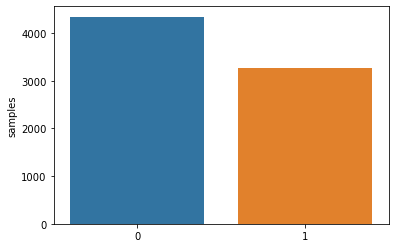

In [8]:
# Barplot
target = train.target.value_counts()
sns.barplot(target.index,target)
plt.gca().set_ylabel('samples')

## Disaster and Non disaster common words 

In [9]:
disaster = train[train['target']==1]['text'].str.split()
Nondisaster = train[train['target']==0]['text'].str.split()

In [ ]:
sns.countplot(disaster)

In [ ]:
sns.countplot(Nondisaster)

# Preprocessing

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HarshSagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HarshSagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HarshSagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Clean Data

In [12]:
train = train.fillna('.')
test = test.fillna('.')

In [13]:
# Train
porter_stem_train = PorterStemmer()

# Initialize
corpus_initialize = []

for i in range(train.shape[0]):
  te = re.sub('[^a-zA-Z]',' ',train['text'][i])
  te = te.lower()
  te = te.split()
  te = [porter_stem_train.stem(word) for word in te if word not in set(stopwords.words('english'))]
  te = ' '.join(te)
  corpus_initialize.append(te)

In [14]:
# Test

# initialize
corpus_initialize_test = []

for i in range(len(test)):
  rw = re.sub('[^a-zA-Z]',' ',test['text'][i])
  rw = rw.lower()
  rw = rw.split()
  rw = [porter_stem_train.stem(word) for word in rw if word not in set(stopwords.words('english'))]
  rw = ' '.join(rw)
  corpus_initialize_test.append(rw)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

x = count_vector.fit_transform(corpus_initialize).toarray()

validation = count_vector.transform(corpus_initialize_test).toarray()

y = train['target']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

s_v_m = SVC()
s_v_m.fit(x_train,y_train)
y_pred = s_v_m.predict(x_test)
f1_score(y_test,y_pred)

In [ ]:
final = s_v_m.predict(validation)
final

In [ ]:
submission = pd.read_csv(r'D:\Downloads\Assignment\ML2\Tweets\nlp-getting-started\sample_submission.csv')
submission['id'] = id
submission['target'] = final

In [ ]:
submission.shape